In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pickle

In [ ]:
data=pd.read_csv('/content/Rainfall.csv')

In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
data.shape

(366, 12)

In [ ]:
data.head(
)

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [ ]:
data['day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [ ]:
# remove extra spaces
data.columns

Index(['day', 'pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'rainfall', 'sunshine', '         winddirection',
       'windspeed'],
      dtype='object')

In [ ]:
data.columns=data.columns.str.strip()

In [ ]:
data.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [ ]:
data=data.drop(columns=["day"])

In [ ]:
data.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [ ]:
print(data.isnull().sum())

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    1
windspeed        1
dtype: int64


In [ ]:
# handling missing values
data['winddirection'].unique()
# data['windspeed'].unique()

array([ 80.,  50.,  40.,  20.,  30.,  60.,  70.,  10., 200., 220., 120.,
       190., 210., 300., 240., 180., 230.,  90., 170., 150., 100., 130.,
        nan, 160., 270., 280., 250., 260., 290., 350., 110., 140.])

In [ ]:
from pathlib import WindowsPath
data['winddirection']=data['winddirection'].fillna(data['winddirection'].mode()[0])

In [ ]:
data['windspeed']=data['windspeed'].fillna(data['windspeed'].median())

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pressure       366 non-null    float64
 1   maxtemp        366 non-null    float64
 2   temparature    366 non-null    float64
 3   mintemp        366 non-null    float64
 4   dewpoint       366 non-null    float64
 5   humidity       366 non-null    int64  
 6   cloud          366 non-null    int64  
 7   rainfall       366 non-null    object 
 8   sunshine       366 non-null    float64
 9   winddirection  366 non-null    float64
 10  windspeed      366 non-null    float64
dtypes: float64(8), int64(2), object(1)
memory usage: 31.6+ KB


In [ ]:
 data['rainfall'].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
data['rainfall']=data['rainfall'].map({"yes":1,"no":0})

In [ ]:
data.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,1,0.0,40.0,13.7


In [ ]:
data.shape

(366, 11)

In [ ]:
 data.describe()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,0.680328,4.419399,101.284153,21.534153
std,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,0.466988,3.934398,81.722827,10.056054
min,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,0.000000,10.000000,4.400000
25%,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.000000,0.500000,40.000000,13.725000
50%,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,1.000000,3.500000,70.000000,20.500000
75%,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,1.000000,8.200000,190.000000,27.825000
max,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,1.000000,12.100000,350.000000,59.500000


In [ ]:
data.columns

Index(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'rainfall', 'sunshine', 'winddirection', 'windspeed'],
      dtype='object')

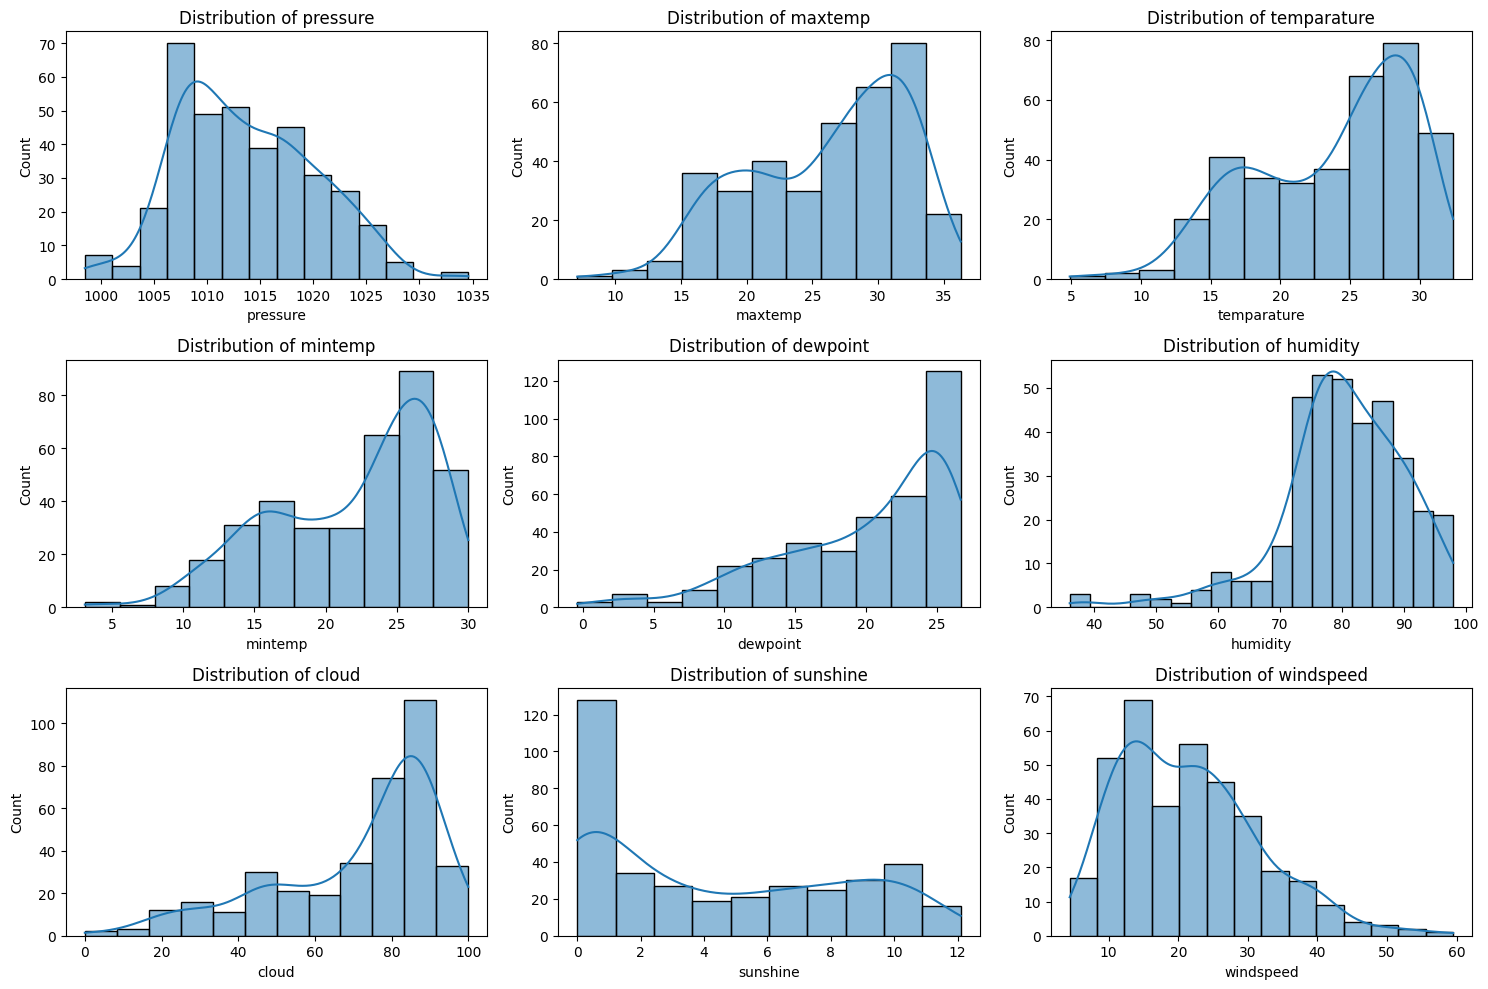

In [ ]:
plt.figure(figsize=(15,10))

for i, column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'sunshine','windspeed'],1):
  plt.subplot(3,3,i)
  sns.histplot(data[column],kde=True)
  plt.title(f"Distribution of {column}")

plt.tight_layout()
plt.show()

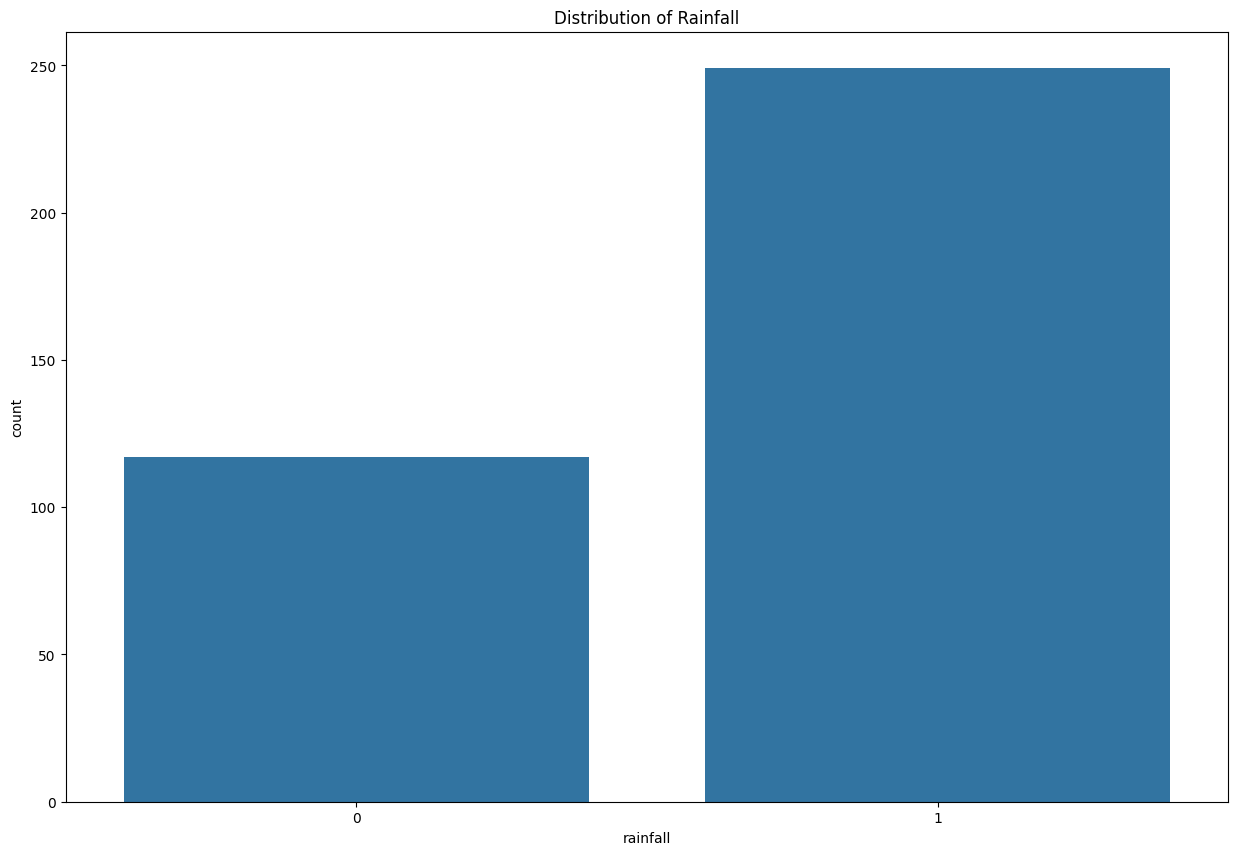

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x='rainfall',data=data)
plt.title("Distribution of Rainfall")
plt.show()

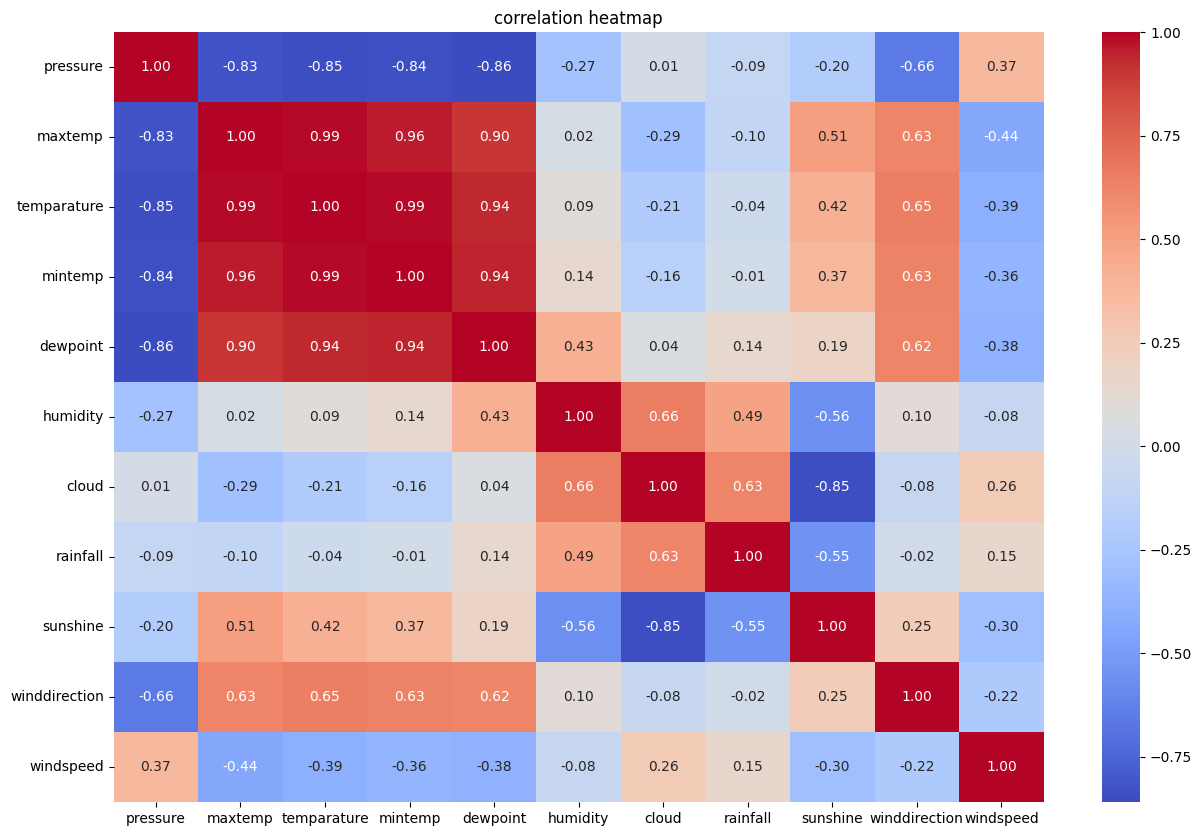

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.title("correlation heatmap")
plt.show()

In [ ]:
data=data.drop(columns=['maxtemp','temparature','mintemp'])

In [ ]:
data.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,19.9,95,81,1,0.0,40.0,13.7


In [ ]:
print(data['rainfall'].value_counts())

rainfall
1    249
0    117
Name: count, dtype: int64


In [ ]:
df_majority=data[data['rainfall']==1]
df_minority=data[data['rainfall']==0]
print(df_majority.shape)
print(df_minority.shape)

(249, 8)
(117, 8)


In [ ]:
df_majority_downsample=resample(df_majority,replace=False,n_samples=len(df_minority),random_state=42)


In [ ]:
df_majority_downsample.shape

(117, 8)

In [ ]:
df_downsample=pd.concat([df_majority_downsample,df_minority])

In [ ]:
df_downsample.shape

(234, 8)

In [ ]:
df_downsample.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
188,1005.9,25.6,77,53,1,10.5,270.0,11.3
9,1017.5,15.5,85,91,1,0.0,70.0,37.7
137,1012.3,20.1,80,86,1,0.3,80.0,39.5
89,1018.3,16.3,79,89,1,2.4,40.0,14.8
157,1008.8,24.7,91,80,1,2.2,20.0,11.2


In [ ]:
#shuffle the data
df_downsample=df_downsample.sample(frac=1,random_state=42).reset_index(drop=True)


In [ ]:
df_downsample.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1022.2,14.1,78,90,1,0.0,30.0,28.5
1,1013.4,19.5,69,17,0,10.5,70.0,12.4
2,1006.1,24.4,74,27,0,10.8,220.0,8.7
3,1007.6,24.8,85,84,1,1.8,70.0,34.8
4,1021.2,8.4,66,18,0,10.1,20.0,24.4


In [ ]:
df_downsample['rainfall'].unique()

array([1, 0])

In [ ]:
df_downsample['rainfall'].value_counts()

,count
rainfall,
1,117
0,117


In [ ]:
x=df_downsample.drop(columns=['rainfall'])
y=df_downsample['rainfall']

In [ ]:
print(x)
print(y)

     pressure  dewpoint  humidity  cloud  sunshine  winddirection  windspeed
0      1022.2      14.1        78     90       0.0           30.0       28.5
1      1013.4      19.5        69     17      10.5           70.0       12.4
2      1006.1      24.4        74     27      10.8          220.0        8.7
3      1007.6      24.8        85     84       1.8           70.0       34.8
4      1021.2       8.4        66     18      10.1           20.0       24.4
..        ...       ...       ...    ...       ...            ...        ...
229    1008.1      25.4        86     75       5.7           20.0        9.5
230    1010.1      19.9        91     89       0.0           70.0       31.8
231    1020.6      14.7        91     88       0.3           50.0       24.4
232    1008.3      24.1        74     29       5.7           10.0        4.4
233    1005.0      26.1        87     82       2.2          160.0       12.6

[234 rows x 7 columns]
0      1
1      0
2      0
3      1
4      0
      .

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train.shape

(187, 7)

In [ ]:
x_test.shape

(47, 7)

In [ ]:
model=RandomForestClassifier()

param_grid_rf={
    "n_estimators":[50,100,200],
    "max_features":["sqrt","log2"],
    "max_depth":[None,10,20,30],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4]
}


In [ ]:
grid_search_rf=GridSearchCV(estimator=model,param_grid=param_grid_rf,cv=4,n_jobs=-1,verbose=2)

grid_search_rf.fit(x_train,y_train)

Fitting 4 folds for each of 216 candidates, totalling 864 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [ ]:
best_model=grid_search_rf.best_estimator_

print("Best parmaters:",grid_search_rf.best_params_)

Best parmaters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
cv_scores=cross_val_score(best_model,x_train,y_train,cv=5)

print("Cross validation scores:",cv_scores)
print("Mean cross validation score:",np.mean(cv_scores))

Cross validation scores: [0.65789474 0.81578947 0.83783784 0.81081081 0.89189189]
Mean cross validation score: 0.8028449502133712


In [ ]:
y_pred=best_model.predict(x_test)
print("test set accuracy:", accuracy_score(y_pred,y_test))
print("test set confusion matrix: ",confusion_matrix(y_pred,y_test))
print("classification report: ",classification_report(y_pred,y_test))

test set accuracy: 0.7446808510638298
test set confusion matrix:  [[17  5]
 [ 7 18]]
classification report:                precision    recall  f1-score   support

           0       0.71      0.77      0.74        22
           1       0.78      0.72      0.75        25

    accuracy                           0.74        47
   macro avg       0.75      0.75      0.74        47
weighted avg       0.75      0.74      0.74        47



In [ ]:
data.columns

Index(['pressure', 'dewpoint', 'humidity', 'cloud', 'rainfall', 'sunshine',
       'winddirection', 'windspeed'],
      dtype='object')

In [ ]:
input=(1010,19,20,80,0.0,60.0,15.5)

input_df=pd.DataFrame([input],columns=['pressure', 'dewpoint', 'humidity', 'cloud',
                                       'sunshine',
       'winddirection', 'windspeed'])
input_df


,pressure,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,1010,19,2,80,0.0,60.0,15.5


In [ ]:

pred=best_model.predict(input_df)


pred

array([1])

In [ ]:
if pred[0]==1:
  print("it will rain today")
else:
  print("it will not rain today")

it will rain today


In [ ]:
#save model and feature names to a pickle file
model_data={"model":best_model,"feature_names":x.columns.tolist()}
with open("rainfall_model.pkl","wb") as f:
  pickle.dump(model_data,f)

In [ ]:
import pickle
import pandas as pd

with open("rainfall_model.pkl","rb" ) as file:
  model_data=pickle.load(file)

model=model_data["model"]
features=model_data["features_names"]

input=(1010,19,20,80,0.0,60.0,15.5)

input_df=pd.DataFrame([input],columns=features)

pred=model.predict(input_df)



# here features names are ['pressure', 'dewpoint', 'humidity', 'cloud',
#                                        'sunshine',
#        'winddirection', 'windspeed'])

